## Introduction

One of the biggest problems that our global society has since many centuries ago is related with the gender gap that exists between genders. This can be reflected in the salary that can earn every sex, or the opportunity that get a job that have each sex.

	Making reference to the job opportunity that the women have is around 49% globally, meanwhile the men have an opportunity around 75%, 26% of difference according to the International Labor Organization, that in some regions this can be reached to the 50%.
    
	Also the International Labor Organization’s page, give us an interactive map that makes us know that Canada (the country in which I will focused this discussion) has the slowest gap in America having only a gap of 9.2%  (60.7% women, 69.8% men).
    
## Use of the data

Canada has been made a great work to reach the slowest job gender gap in the region. But this have been done through many years of hard work. To reflect the great job does, I will create a graphical representation of this grow from 1976 to 2019 making a comparisson between the different provinces and kind of job

	For this project I will use the data provided by Kaggle called Employment Rate in Canada in which the employment rate is represented in three ways:
    1. Employment: person that works the full or part-time?
    2. Full-time employment: that works all the 40 hours per week
    3. Part-time employment: the person who work less than 40 hours, in some countries this has a limit of 30     hrs per week

	Also, this information contains a sub division according to the gender of the employee and  different columns that makes reference to the ten provinces in Canada. For this I will delete all the rows that makes reference to the sum of the two genders in order to show what this study is trying to show.

This work will be focused in show the progress that Canada has made in the gender gap and how those numbers have been decreased across the years.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

df_emp = pd.read_csv('employment_canada.csv')
df_emp.head()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,1976-01,Employment,Both sexes,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5
1,1976-01,Employment,Females,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,1976-01,Employment,Males,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
3,1976-01,Full-time employment,Both sexes,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2
4,1976-01,Full-time employment,Females,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3


First I will divide the data frame into three different that will contain the Employment, Full-time employment and Part-time employment and also I will delete from the column sex the attribute the ones that contains Both sexes

In [2]:
df_emp = df_emp[df_emp['sex'] != 'Both sexes']

df_total_emp = df_emp[df_emp['variable'] == 'Employment']
df_full_emp = df_emp[df_emp['variable'] == 'Full-time employment']
df_part_emp = df_emp[df_emp['variable'] == 'Part-time employment ']

In [3]:
df_total_emp.head()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
1,1976-01,Employment,Females,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,1976-01,Employment,Males,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
10,1976-02,Employment,Females,312.9,389.0,159.7,84.9,50.8,109.8,1429.5,16.2,876.9,133.2
11,1976-02,Employment,Males,517.8,652.6,265.7,148.0,110.4,190.4,2283.9,26.5,1659.5,242.3
19,1976-03,Employment,Females,318.1,389.0,161.9,82.4,49.9,109.7,1441.1,16.8,885.8,130.3


In [4]:
df_full_emp.head()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
4,1976-01,Full-time employment,Females,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3
5,1976-01,Full-time employment,Males,475.8,602.5,249.2,139.0,107.8,180.8,2124.9,24.5,1588.7,218.9
13,1976-02,Full-time employment,Females,223.3,278.1,121.0,65.1,41.9,83.6,1084.3,13.0,730.1,95.0
14,1976-02,Full-time employment,Males,481.0,602.7,252.4,143.1,106.0,179.0,2135.0,24.7,1584.0,224.3
22,1976-03,Full-time employment,Females,225.7,283.1,120.1,63.9,41.5,84.4,1089.9,12.7,737.2,92.6


In [5]:
df_part_emp.head()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
7,1976-01,Part-time employment,Females,89.2,104.7,45.0,21.6,8.6,25.7,342.6,3.8,152.6,38.6
8,1976-01,Part-time employment,Males,36.7,47.9,13.4,6.3,3.8,11.9,155.7,1.7,77.2,18.7
16,1976-02,Part-time employment,Females,89.6,110.9,38.7,19.7,8.9,26.1,345.2,3.2,146.7,38.2
17,1976-02,Part-time employment,Males,36.8,49.9,13.3,4.9,4.4,11.4,148.8,1.8,75.5,18.0
25,1976-03,Part-time employment,Females,92.4,105.9,41.8,18.6,8.4,25.2,351.1,4.1,148.6,37.7


Now we can see that there were three tables created with this process. But before I will display the information in three different plots to show the process across the time.

Text(0, 0.5, 'economically active population')

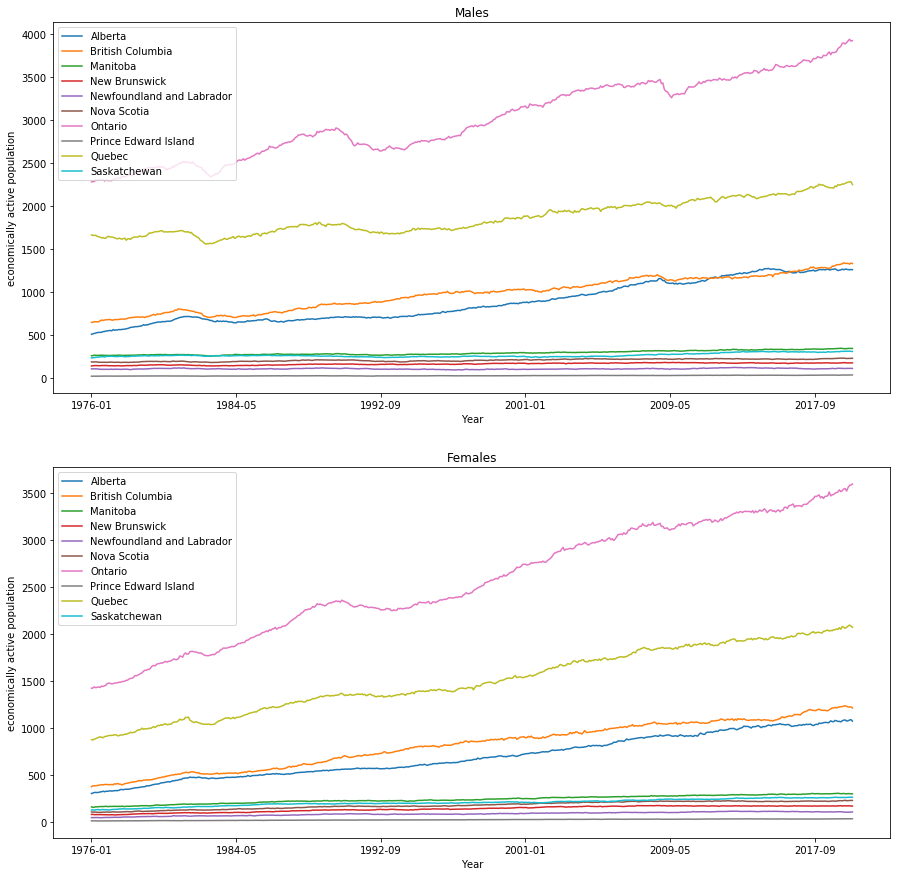

In [6]:
fig, axes = plt.subplots(2)

df_total_emp[df_total_emp['sex']=='Males'].plot(ax=axes[0], title='Males', x='month')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("economically active population")

df_total_emp[df_total_emp['sex']=='Females'].plot(ax=axes[1], figsize=(15,15),title='Females', x='month')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("economically active population")

Text(0, 0.5, 'economically active population')

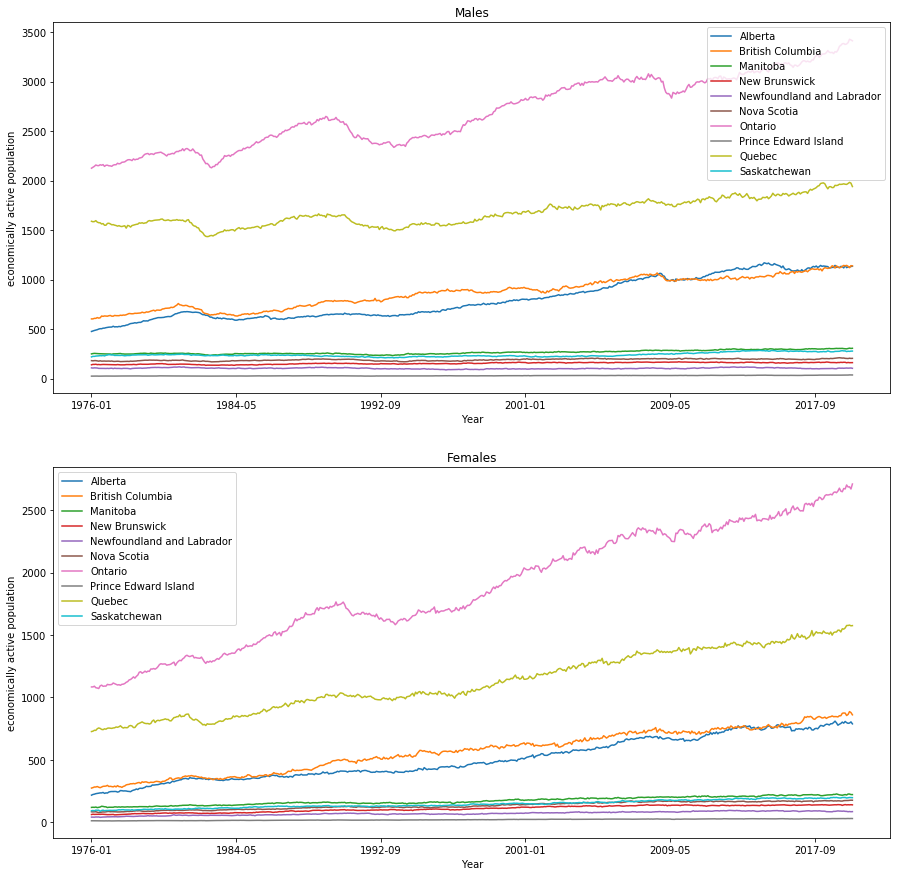

In [7]:
fig, axes = plt.subplots(2)

df_full_emp[df_full_emp['sex']=='Males'].plot(ax=axes[0], title='Males', x='month')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("economically active population")

df_full_emp[df_full_emp['sex']=='Females'].plot(ax=axes[1], figsize=(15,15),title='Females', x='month')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("economically active population")

Text(0, 0.5, 'economically active population')

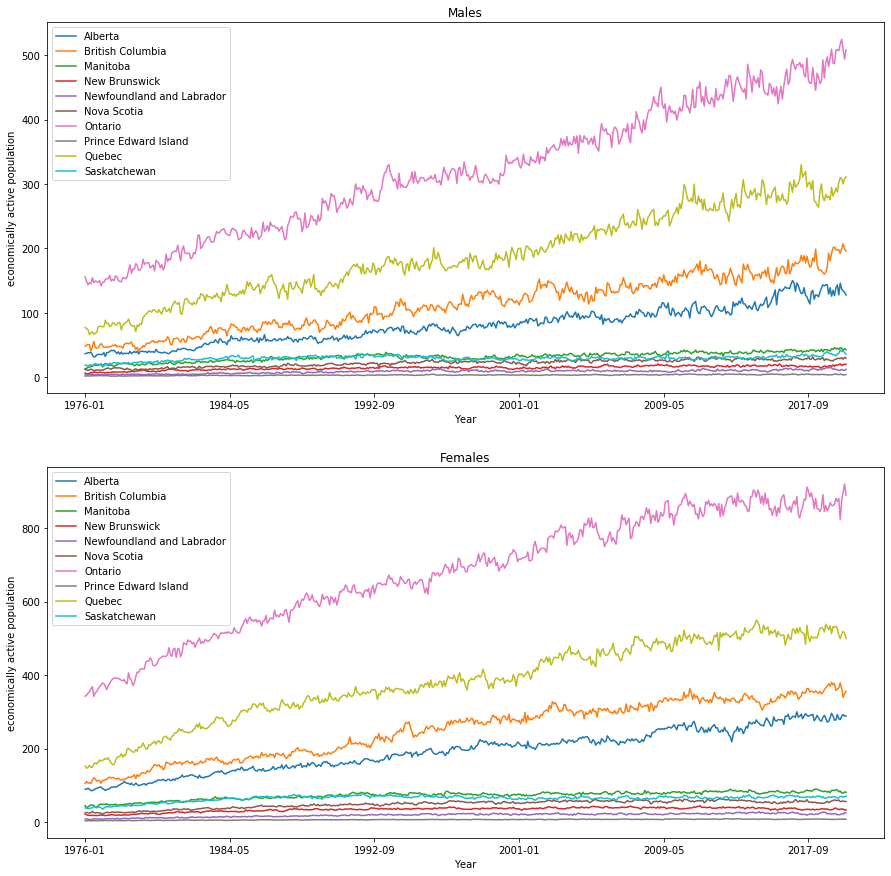

In [8]:
fig, axes = plt.subplots(2)

df_part_emp[df_part_emp['sex']=='Males'].plot(ax=axes[0], title='Males', x='month')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("economically active population")

df_part_emp[df_part_emp['sex']=='Females'].plot(ax=axes[1], figsize=(15,15),title='Females', x='month')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("economically active population")

According with the graphs that we can see, there is still a difference around 500 thousand employments consider the Full and part time work. But we can also see that the sex that have more jobs as full-time are males, meanwhile the females have more economically active population in the part-time work.

## Methodology
To analyze this in a detailed way, I will display three bar charts in which the percentage gap will be seen in a more friendly way. For that I will keep only the last row in which the actual values will be in the charts

### Total employment

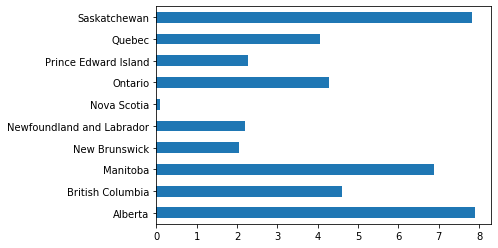

In [124]:
list_f = df_total_emp.iloc[-2, 3:13].values.tolist()
list_m = df_total_emp.iloc[-1, 3:13].values.tolist()

total_list = np.add(list_f, list_m)
dif_list = np.subtract(list_m, list_f)
per_list = np.divide(dif_list,total_list)*100

df_total_comp = df_total_emp.tail(2)

df_total_comp.drop(columns=["month","variable","sex"], inplace=True)
df_total_comp.loc[0] = per_list
df_total_comp = df_total_comp.loc[0]
df_total_comp.plot.barh()

### Full-time employmet

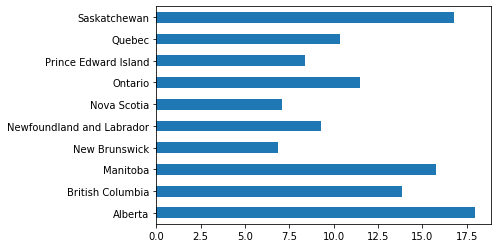

In [125]:
list_f = df_full_emp.iloc[-2, 3:13].values.tolist()
list_m = df_full_emp.iloc[-1, 3:13].values.tolist()

total_list = np.add(list_f, list_m)
dif_list = np.subtract(list_m, list_f)
per_list = np.divide(dif_list,total_list)*100

df_total_comp = df_full_emp.tail(2)

df_total_comp.drop(columns=["month","variable","sex"], inplace=True)
df_total_comp.loc[0] = per_list
df_total_comp = df_total_comp.loc[0]
df_total_comp.plot.barh()

### Part-time employment

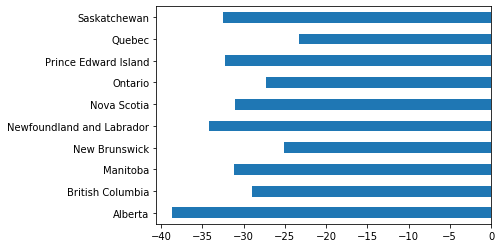

In [126]:
list_f = df_part_emp.iloc[-2, 3:13].values.tolist()
list_m = df_part_emp.iloc[-1, 3:13].values.tolist()

total_list = np.add(list_f, list_m)
dif_list = np.subtract(list_m, list_f)
per_list = np.divide(dif_list,total_list)*100

df_total_comp = df_part_emp.tail(2)

df_total_comp.drop(columns=["month","variable","sex"], inplace=True)
df_total_comp.loc[0] = per_list
df_total_comp = df_total_comp.loc[0]
df_total_comp.plot.barh()

## Result section
We can see in the bar and linear graph that the total employment in the provinces of Alberta, Saskatchewan and Manitoba have a great gender gap even more than 15% of the gap in the regions, and also at first sight we could say that Nova Scotia is the region with almost 0% gap in the Contry. But if we see the next two Graph bar we will see that the gender gap is presented around 7.5% in the Total employment.

    The last two graph show us that the gap is presented in all the provinces if we divide in part and full-time job. The men have more employments at full-time and meanwhile the women have more part-time employment.

### Conclusion section
We can see with this report that the data can be reflected in many ways that can show that the gender gap doesn't exist at all. But if we drill down we can find it. 

But not at all is said, we can stay in the province that fits more to our necessities, I mean, if you are a woman that wants to work part-time a great option could be move out to Alberta, where you can find a job more easily, but if you are looking for a full-time job, you can move out to Nova Scotia or New Brunswick